In [1]:

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:

df=pd.read_csv("cardata.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#CLEANING OF DATA

In [8]:

df["Model"]=df.CarName.apply(lambda x:str(x.split(' ')[0]))
df.drop('CarName',axis=1,inplace=True)
df.drop('car_ID',axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:

df.Model.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
#correcting spellings
df.Model.replace('maxda','mazda',inplace=True)
df.Model.replace('Nissan', 'nissan',inplace=True)
df.Model.replace('porcshce','porsche',inplace=True)
df.Model.replace(['vokswagen','vw'],'volkswagen',inplace=True)
df.Model.replace('toyouta','toyota',inplace=True)
df.Model.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
#separating categorical columns 
cat=[]
for col in df:
    if(df[col].dtype==object):
        cat.append(col)
print(cat)        

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Model']


In [12]:
for col in cat:
    print(col,df[col].unique())

fueltype ['gas' 'diesel']
aspiration ['std' 'turbo']
doornumber ['two' 'four']
carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
enginetype ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Model ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [13]:
cat_data=df[cat]

In [14]:
df.fuelsystem.replace('mpfi','mfi',inplace=True)

In [15]:
df.symboling.unique().sum()

3

visualising categorical features

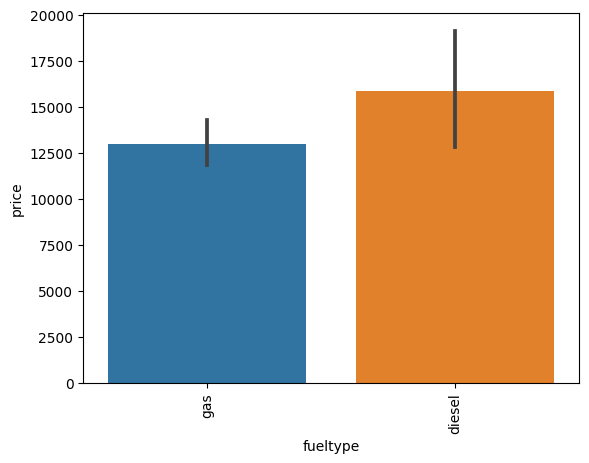

In [17]:
sbn.barplot(x=df['fueltype'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price of diesel cars are more

<Axes: xlabel='fueltype', ylabel='Count'>

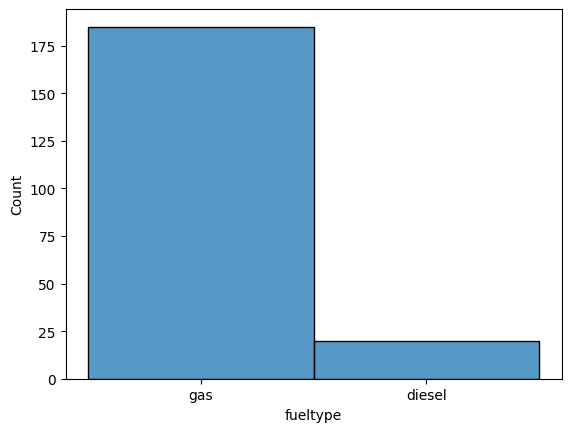

In [18]:
sbn.histplot(df.fueltype)

demand of gasoline cars are more

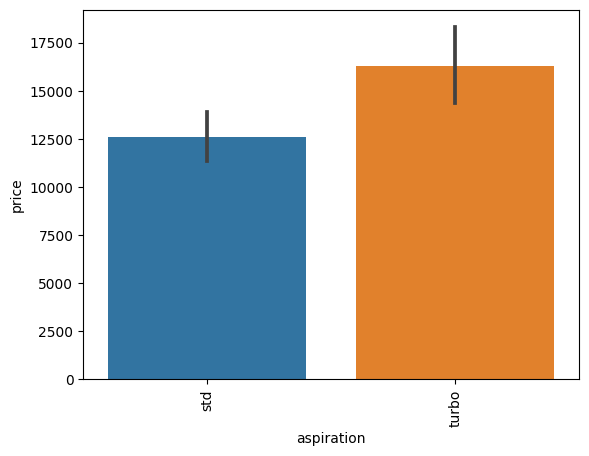

In [19]:
sbn.barplot(x=df['aspiration'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price of turbo cars are more

<Axes: xlabel='aspiration', ylabel='Count'>

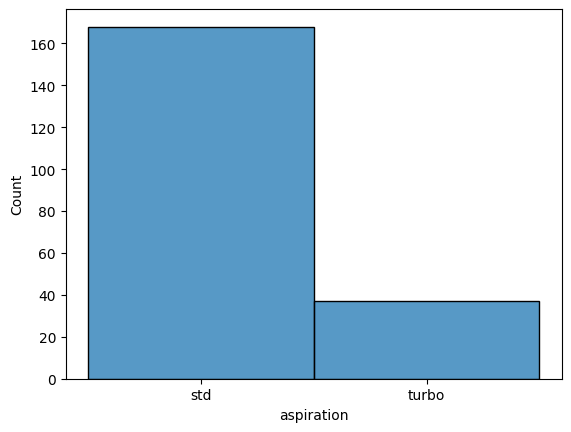

In [20]:
sbn.histplot(df.aspiration)

standard cars are more in demand

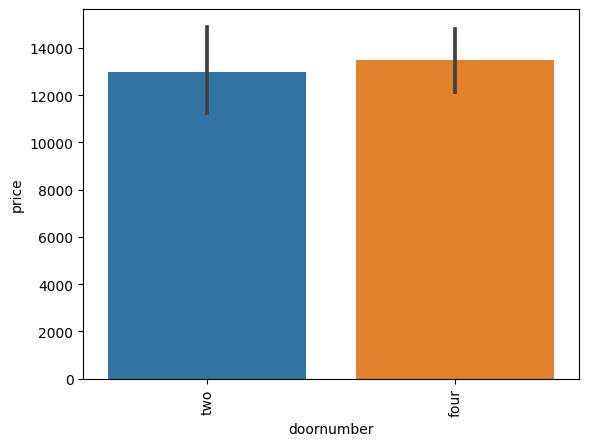

In [21]:
sbn.barplot(x=df['doornumber'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

there is not much difference in cars with 2door and 4door

<Axes: xlabel='doornumber', ylabel='Count'>

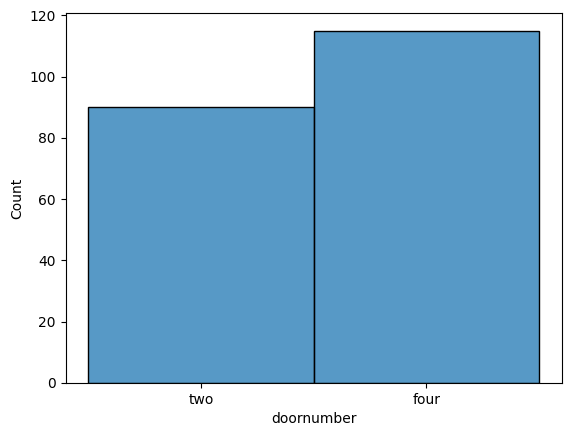

In [22]:
sbn.histplot(df.doornumber)

fourwheeldrive is more in demand

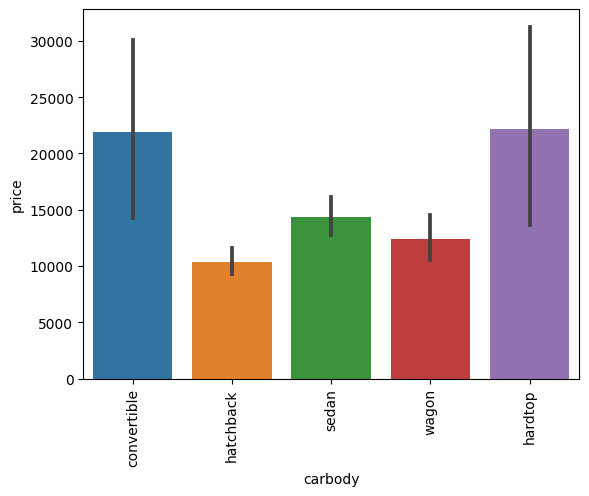

In [23]:
sbn.barplot(x=df['carbody'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

max price= convertible and hardtop (nearly same)
min price is of hatchback

<Axes: xlabel='drivewheel', ylabel='Count'>

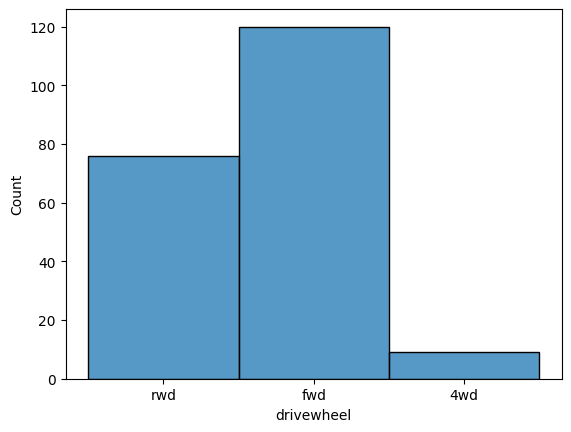

In [24]:
sbn.histplot(df.drivewheel)

demand of forward drive is max.
demand for 4wheeldrive is noticeably less...

<Axes: xlabel='enginelocation', ylabel='Count'>

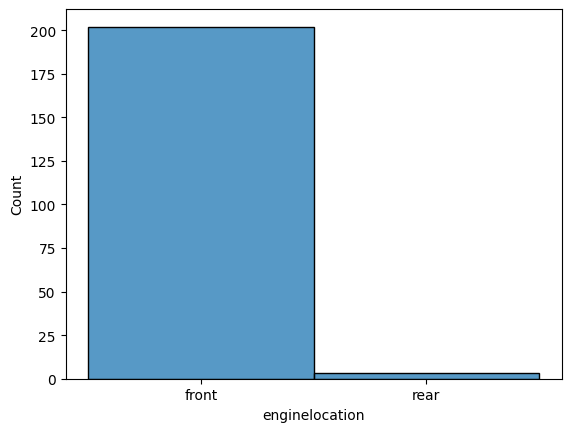

In [25]:
sbn.histplot(df.enginelocation)

demand for front is max
demand for rear is considerably less.

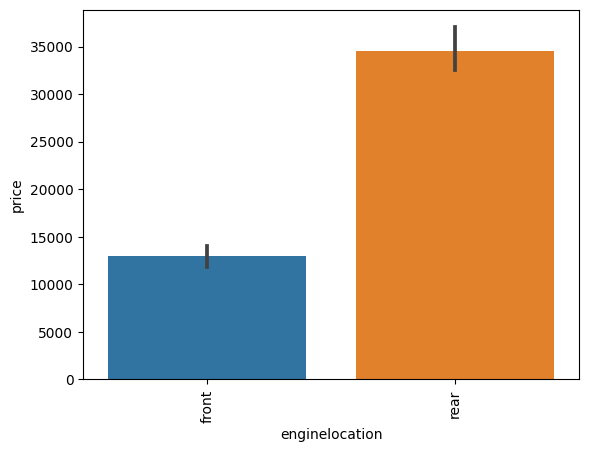

In [26]:
sbn.barplot(x=df['enginelocation'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price of rear is quite higher than front.

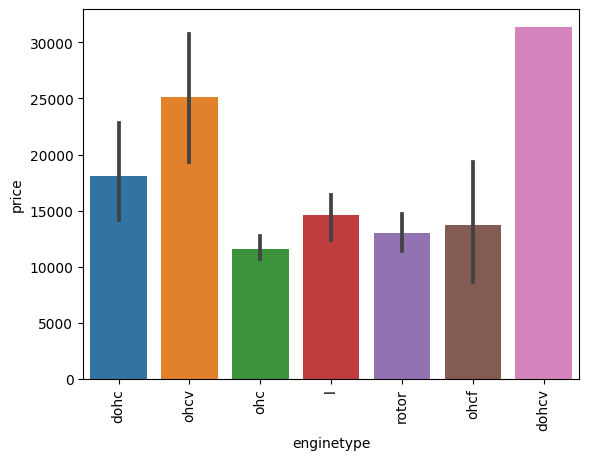

In [27]:
sbn.barplot(x=df['enginetype'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='enginetype', ylabel='Count'>

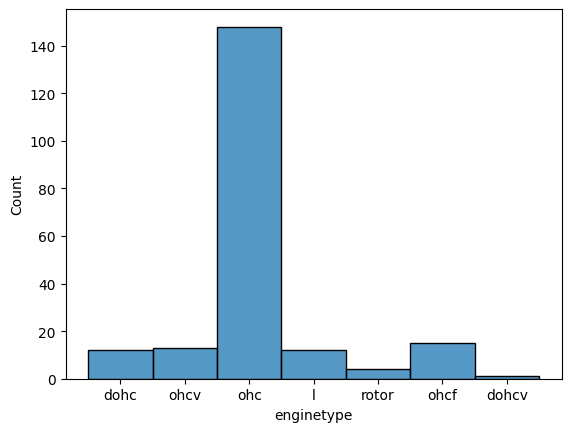

In [28]:
sbn.histplot(df.enginetype)

demand for ohc is considerably high.

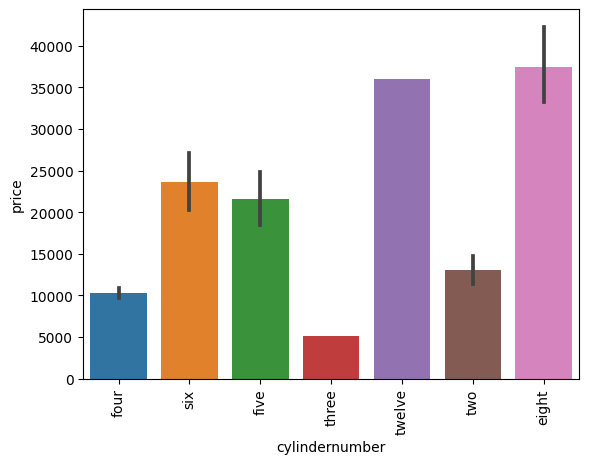

In [29]:
sbn.barplot(x=df['cylindernumber'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price for cars with 12 and cylinders are almost same.


<Axes: xlabel='cylindernumber', ylabel='Count'>

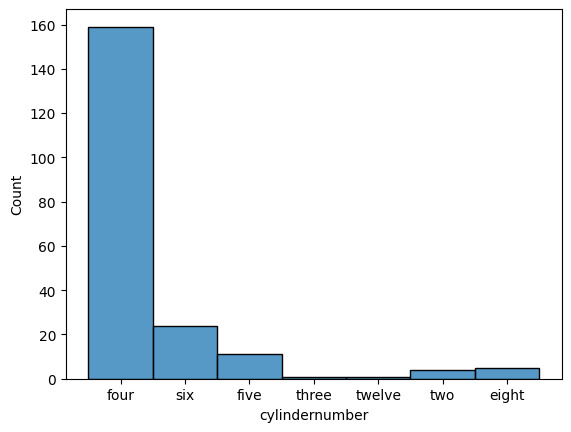

In [30]:
sbn.histplot(df.cylindernumber)

demand for four cylinder number is quite high.

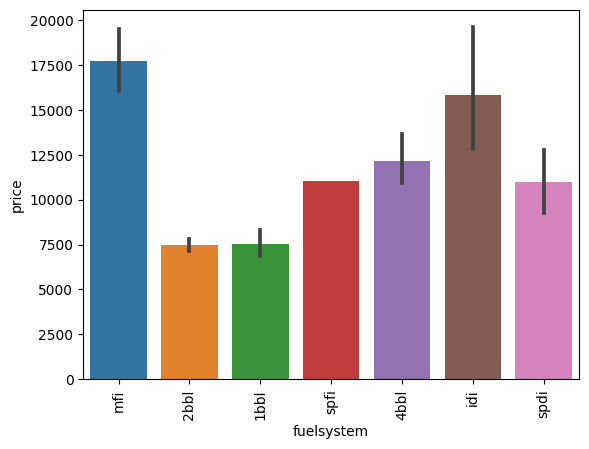

In [31]:
sbn.barplot(x=df['fuelsystem'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

price for mfi and idi are nearby .

<Axes: xlabel='fuelsystem', ylabel='Count'>

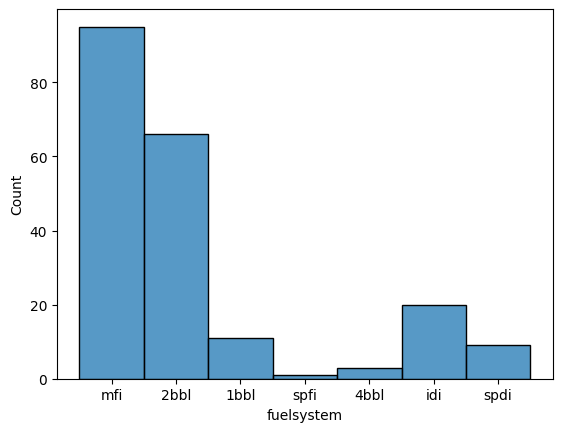

In [32]:
sbn.histplot(df.fuelsystem)

price of mfi is high

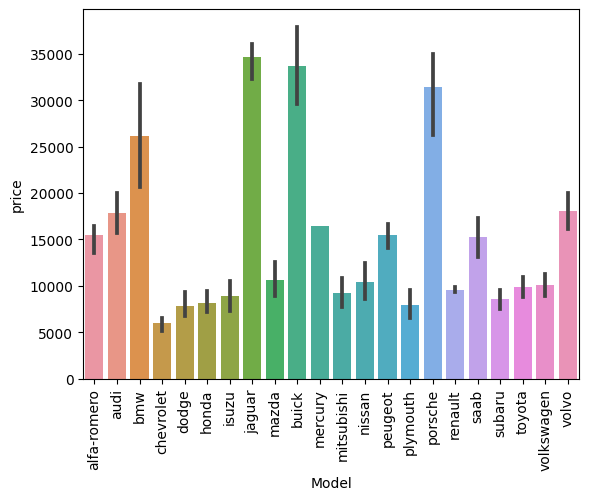

In [33]:
sbn.barplot(x=df['Model'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

Prices of Jaguar, mazda,porsche are quite higher.

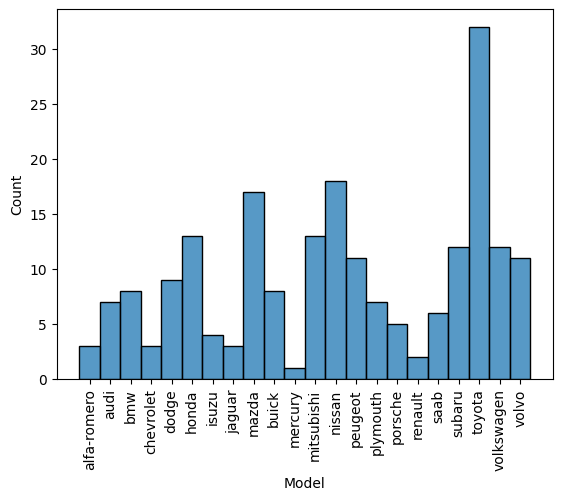

In [34]:
sbn.histplot(df.Model)
plt.xticks(rotation='vertical')
plt.show()

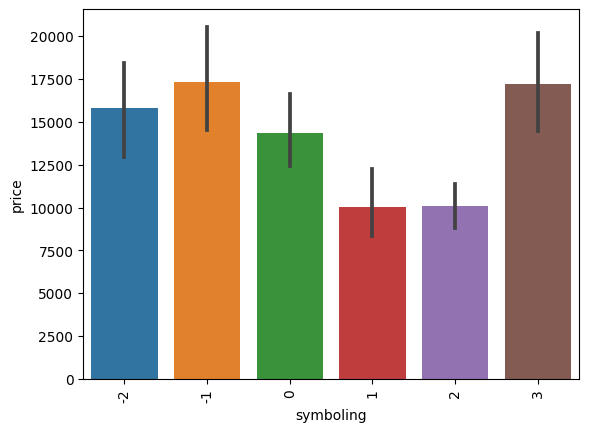

In [35]:
sbn.barplot(x=df['symboling'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='symboling', ylabel='Count'>

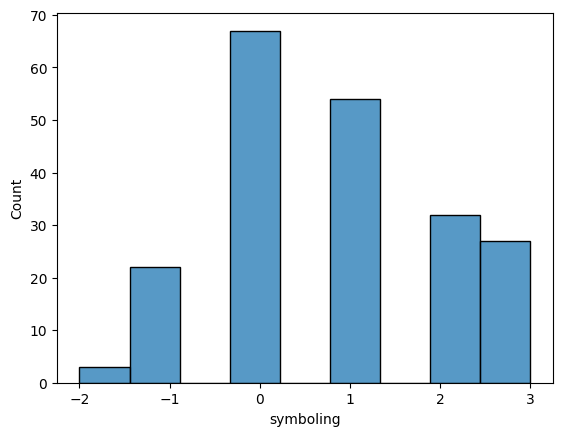

In [36]:
sbn.histplot(df.symboling)

NUMERICAL DATA VISUALISATION

In [37]:
num_data=df.drop(cat,axis=1)
num_data.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

seeing the price-our target 

<Axes: xlabel='price', ylabel='Density'>

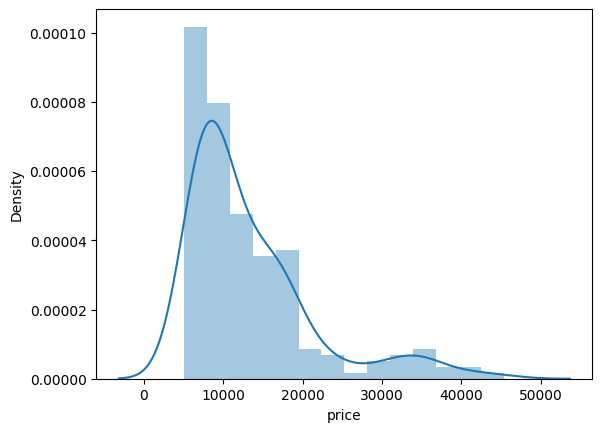

In [38]:
sbn.distplot(df.price)

<Axes: >

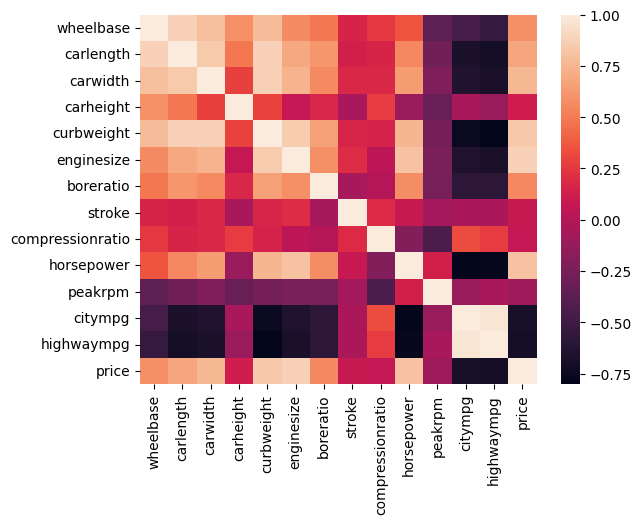

In [39]:
sbn.heatmap(num_data.corr())

Inference:
1. high correlation of tje following features with price:
a. +ve => wheelbase,carheight,carwidth,carlength,curbweight,enginesize,horsepower,boreratio
b. -Ve=> citympg,highwaympg
2.high correlation among the following the features:
a.carheight,carwidth
b.horsepower,curbwidth
c.engine size and curbweight.

conclusion:
1.we can derrive new features namely:
a.M3 size: cubic metric size -carwidth*carlength*carheight
b.Power to weight ratio: horsepower/curbweight
2.following features can be dropped:
stroke,compression ratio,peakrpm,carhieght,carlenght,carwidth,horsepower,curbweight.

In [40]:
num_data["M3 size"]=num_data['carlength']*num_data['carwidth']*num_data['carheight']
num_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,M3 size
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832


In [41]:
num_data["powerweightratio"]=num_data["horsepower"]/num_data["curbweight"]

In [42]:
num_data.drop(['stroke','compressionratio','peakrpm','carheight','carlength','carwidth','horsepower','curbweight'],axis=1,inplace=True)

In [43]:
num_data.head()

,wheelbase,enginesize,boreratio,citympg,highwaympg,price,M3 size,powerweightratio
0,88.6,130,3.47,21,27,13495.0,528019.904,0.043564
1,88.6,130,3.47,21,27,16500.0,528019.904,0.043564
2,94.5,152,2.68,19,26,16500.0,587592.640,0.054552
3,99.8,109,3.19,24,30,13950.0,634816.956,0.043646
4,99.4,136,3.19,18,22,17450.0,636734.832,0.040722


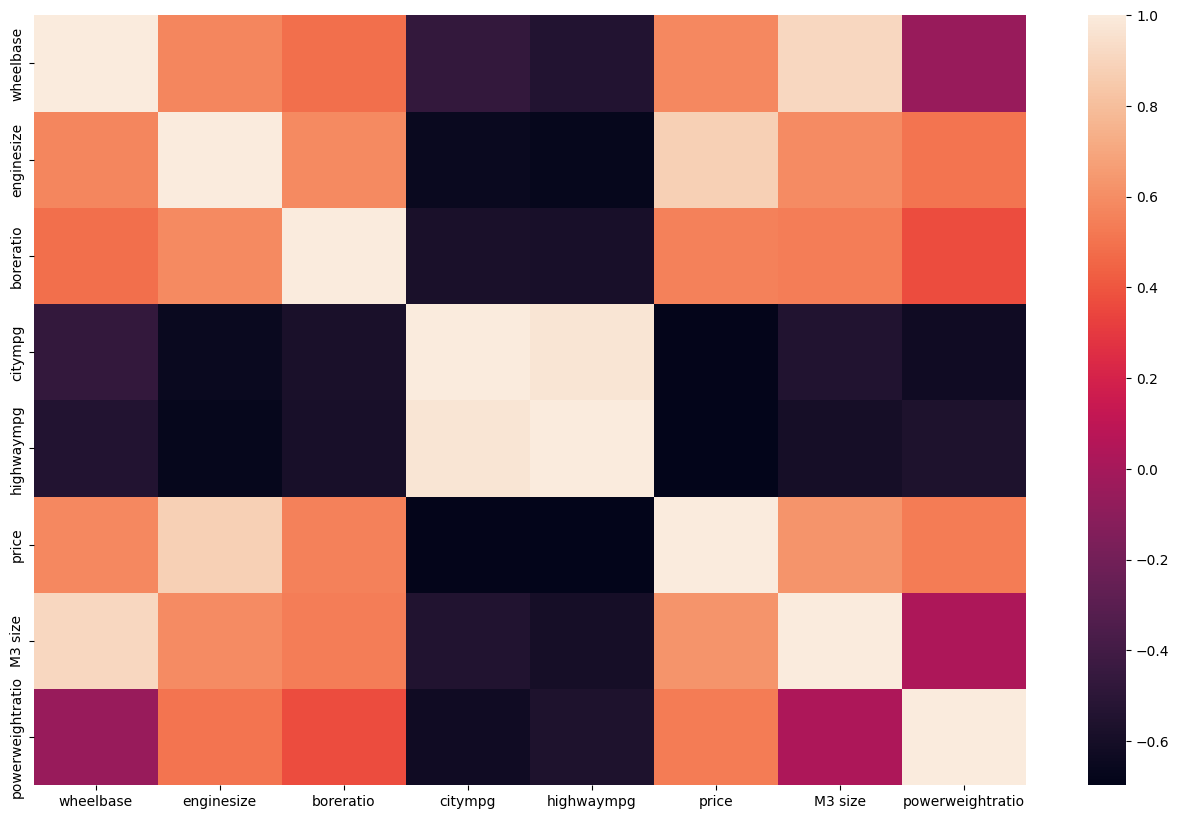

In [44]:
plt.figure(figsize=(16,10))
sbn.heatmap(num_data.corr())
plt.show()

finalizing our dataset

In [45]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [46]:
scaled = scaled.fit_transform(num_data)
print(scaled)

[[-1.6907718   0.07444893  0.51907138 ...  0.02739114 -1.14419531
   0.36668374]
 [-1.6907718   0.07444893  0.51907138 ...  0.4044611  -1.14419531
   0.36668374]
 [-0.70859588  0.60404617 -2.40488029 ...  0.4044611  -0.39267042
   1.51767836]
 ...
 [ 1.72187336  1.10957081  0.9262039  ...  1.02998314  1.30242947
   0.46358873]
 [ 1.72187336  0.43553795 -1.18348276 ...  1.15358178  1.30242947
  -0.74506318]
 [ 1.72187336  0.33924755  1.66644483 ...  1.17303131  1.30242947
  -0.29668102]]


In [47]:
data=pd.concat([num_data,cat_data],axis=1)
data.head()

,wheelbase,enginesize,boreratio,citympg,highwaympg,price,M3 size,powerweightratio,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Model
0,88.6,130,3.47,21,27,13495.0,528019.904,0.043564,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,88.6,130,3.47,21,27,16500.0,528019.904,0.043564,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,94.5,152,2.68,19,26,16500.0,587592.640,0.054552,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,99.8,109,3.19,24,30,13950.0,634816.956,0.043646,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,99.4,136,3.19,18,22,17450.0,636734.832,0.040722,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [48]:
def dummies(x,cat_data):
    temp = pd.get_dummies(cat_data[x], drop_first = True)
    cat_data = pd.concat([cat_data, temp], axis = 1)
    cat_data.drop([x], axis = 1, inplace = True)
    return cat_data

In [49]:
cat_data.fueltype

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object

In [53]:
for col in cat:
    data=dummies(col,data)

KeyError: 'fueltype'

In [54]:
data.shape

(205, 58)

In [55]:
data.columns

Index(['wheelbase', 'enginesize', 'boreratio', 'citympg', 'highwaympg',
       'price', 'M3 size', 'powerweightratio', 'gas', 'turbo', 'two',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

SPLITING DATA

In [56]:
x=data.drop('price',axis=1)
y=data.price

In [57]:
from sklearn.model_selection import train_test_split



X_train,X_test,Y_train,Y_test = train_test_split(x,y, train_size = 0.7, random_state = 100)



    PREPARING OUR MODEL

MODEL 1: LINEAR REGRESSION MODEL

In [58]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)
print(model1.coef_)
print(model1.intercept_)

[ 3.23317775e+02  2.61877395e+02 -1.71317755e+04 -1.56827106e+02
  1.88945686e+02  2.42436544e-03 -1.92273595e+04  1.27309329e+02
  3.64132146e+03 -2.75907609e+02 -6.19101905e+03 -5.89615106e+03
 -6.16733297e+03 -5.79245322e+03 -5.03536930e+02  1.55382956e+03
  3.87008619e+03  5.84964460e+03  5.12278188e+03 -2.34866407e+03
  5.32807271e+03  1.12712591e+02  1.33342487e+04  1.00075551e+04
  1.36928919e+04  1.92965095e+03  1.20455205e+04 -1.08829803e+04
  1.33342487e+04  2.13332093e+03  4.44587139e+02 -1.27309329e+02
 -2.72848411e-11  1.39188273e+03  3.37270204e+02 -2.91038305e-11
  5.86539604e+03  1.49244249e+04  4.20503402e+03  2.29808050e+03
  7.88887106e+02  2.89043878e+03  3.35906318e+03 -1.30670202e+03
  2.95172718e+03  5.45696821e-12  2.80194174e+02  2.86898359e+03
 -6.92273866e+03  8.31172285e+02  1.63621092e+04  1.48630682e+03
  8.99835992e+03  1.45798651e+03  1.88786146e+03  2.71431395e+03
  7.00602582e+03]
-7723.1456022247


In [59]:
r_squared = model1.score(X_train,Y_train)
print(r_squared)

0.9557534840578226


In [60]:
from sklearn.metrics import mean_absolute_error
ypred=model1.predict(X_train)
mean_absolute_error(Y_train,ypred)

1174.6790710484167

In [61]:
print(model1.score(X_train,Y_train))
print(model1.score(X_test,Y_test))

0.9557534840578226
0.8465525366806645


MODEL2 :RANDOMFOREST REGRESSOR

In [62]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(random_state=0,max_depth= 16,n_estimators=10)
model2.fit(X_train,Y_train)
print(model2.score(X_train,Y_train))
print(model2.score(X_test,Y_test))

0.985848582783069
0.9032426964409948


CONCLUSION:
the best model from the above two is Model2.
as 
score for train dataset is higher in model2.
.difference between test and train score is lesser in model2.